# TensorFlow Distributions: A Gentle Introduction

In [40]:
import collections

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

import matplotlib.pyplot as plt

## Basic Univariate Distributions (기본 단변량 분포)




정규 분포를 만들어 보겠습니다.



In [41]:
n = tfd.Normal(loc=0., scale=1.)
n

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

(여러) 샘플을 추출할 수 있습니다.

In [42]:
n.sample(), n.sample(3)

(<tf.Tensor: shape=(), dtype=float32, numpy=-1.0155326>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.2948251, -0.8526787, -3.358156 ], dtype=float32)>)

(여러개의) 로그 확률을 평가할 수 있습니다.

In [43]:
n.log_prob(0.), n.log_prob([0., 2., 4.])

(<tf.Tensor: shape=(), dtype=float32, numpy=-0.9189385>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.9189385, -2.9189386, -8.918939 ], dtype=float32)>)

우리는 다양한 분포를 가지고 있습니다. 베르누이를 시도해 봅니다.

In [44]:
b = tfd.Bernoulli(probs=0.7)
b

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[] event_shape=[] dtype=int32>

In [45]:
b.sample(), b.sample(8)

(<tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(8,), dtype=int32, numpy=array([1, 1, 1, 1, 0, 1, 0, 1], dtype=int32)>)

In [46]:
b.log_prob(1), b.log_prob([1, 0, 1, 0])

(<tf.Tensor: shape=(), dtype=float32, numpy=-0.35667497>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([-0.35667497, -1.2039728 , -0.35667497, -1.2039728 ], dtype=float32)>)

## Multivariate Distributions (다변량 분포)

대각선 공분산을 사용하여 다변량 정규 분포를 생성합니다.


In [47]:
nd = tfd.MultivariateNormalDiag(loc=[0., 10.], scale_diag=[1., 4.])
nd

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

이것을 앞서 생성한 univariate normal과 비교하면 무엇이 다른가요?

일변량 정규 분포가 스칼라 분포임을 나타내는 `()`의 `event_shape`가 있음을 알 수 있습니다. 다변량 정규 분포의 `event_shape`는 `2`이며 이는 이 분포의 기본 [이벤트 공간](https://en.wikipedia.org/wiki/Event_(probability_theory & # 41;)이 2 차원임을 나타냅니다.

샘플링은 이전과 동일하게 작동합니다.

In [48]:
nd.sample(), nd.sample(5)

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-0.36409357,  9.884569  ], dtype=float32)>,
 <tf.Tensor: shape=(5, 2), dtype=float32, numpy=
 array([[ 1.8686703 ,  6.087338  ],
        [-0.06043299,  9.375316  ],
        [-1.5137217 , 14.353813  ],
        [-1.0788814 , 12.860201  ],
        [-0.35724637, 11.818091  ]], dtype=float32)>)

In [49]:
nd.log_prob([0., 10])

<tf.Tensor: shape=(), dtype=float32, numpy=-3.2241714>

다변량 정규 분포에는 일반적으로 대각 공분산이 없습니다. TFD는 여기서 사용하는 완전 공분산 사양을 포함하여 다변량 정규화를 생성하는 여러 방법을 제공합니다.

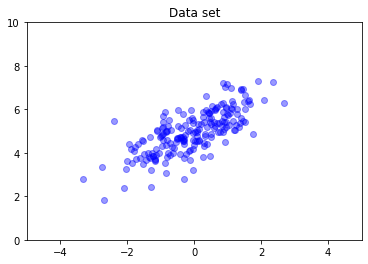

In [50]:
nd = tfd.MultivariateNormalTriL(
    loc = [0., 5], scale_tril=tf.linalg.cholesky([[1., .7], [.7, 1.]]))

data = nd.sample(200)
plt.scatter(data[:, 0], data[:, 1], color='blue', alpha=0.4)
plt.axis([-5, 5, 0, 10])
plt.title("Data set")
plt.show()

## 다중 분포

우리의 첫 번째 Bernoulli 분포는 하나의 fair coin 던지기를 나타냅니다. 단일 `Distribution` 객체에서 각각 고유한 매개 변수가 있는 독립적인 Bernoulli 분포의 배치를 만들 수도 있습니다.

In [51]:
b3 = tfd.Bernoulli(probs=[.3, .5, .7])
b3

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[3] event_shape=[] dtype=int32>

이것이 의미하는 바를 명확히 하는 것이 중요합니다. 위의 호출은 동일한 Python `Distribution` 객체에 포함되는 세 개의 독립적인 Bernoulli 분포를 정의합니다. 세 가지 분포는 개별적으로 조작할 수 없습니다. `batch_shape`가 세 분포의 배치를 나타내는 `(3,)` 이고 `event_shape`가 `()` 이며 개별 분포에 일변량 이벤트 공간이 있음을 나타냅니다.

`sample`을 호출하면 세 가지 모두에서 샘플을 얻습니다.

In [52]:
b3.sample(), b3.sample(6)

(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 1, 1], dtype=int32)>,
 <tf.Tensor: shape=(6, 3), dtype=int32, numpy=
 array([[1, 1, 1],
        [0, 0, 0],
        [0, 1, 1],
        [0, 0, 1],
        [0, 0, 1],
        [1, 1, 0]], dtype=int32)>)

`prob`를 호출하여 벡터를 전달하고(`log_prob`와 동일한 모양 의미를 가집니다. 명확성을 위해 이 작은 Bernoulli 예제와 함께`prob`를 사용하지만 일반적으로 응용 프로그램에서는`log_prob`이 선호됩니다)
각 코인이 그 값을 산출할 확률을 평가할 수 있습니다. 

In [53]:
b3.prob([1, 1, 0])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.29999998, 0.5       , 0.29999998], dtype=float32)>

API에 batch shape이 포함된 이유는 무엇입니까? 의미상으로는 분포 목록을 만들고 `for` 루프로 반복하여 동일한 계산을 수행할 수 있습니다. 그러나 동일하게 매개 변수화된 분포의 (잠재적으로 큰) 집합을 갖는 것은 매우 일반적이며 가능할 때마다 벡터화된 계산을 사용하는 것은 하드웨어 가속기를 사용하여 빠른 계산을 수행할 수 있는 핵심 요소입니다.

## Independent를 사용하여 배치를 이벤트로 집계

이전 섹션에서는 세 번의 동전 던지기를 나타내는 단일 `Distribution` 객체인 `b3`을 만들었습니다. 벡터 $v$에서 `b3.prob`를 호출하면 $i$ 번째 항목은 $i$ 번째 동전이 $v[i]$ 값을 가질 확률입니다.

대신 동일한 기본 패밀리의 독립 랜덤 변수에 대한 "공동" 분포를 지정한다고 가정합니다. 이것은 수학적으로 다른 객체입니다. 이 새로운 분포의 경우 $v$ 벡터의 `prob`는 전체 동전 세트가 $v$ 벡터와 일치할 확률을 나타내는 단일 값을 반환합니다.

이를 어떻게 성취합니까? 우리는 `Independent`라는 "higher-order" 분포를 사용하는데, 분포를 가져와 배치 형태가 이벤트 형태로 이동한 새로운 분포를 산출합니다.

In [54]:
b3_joint = tfd.Independent(b3, reinterpreted_batch_ndims=1)
b3_joint

<tfp.distributions.Independent 'IndependentBernoulli' batch_shape=[] event_shape=[3] dtype=int32>

원본 'b3'의 shape과 비교



In [55]:
b3

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[3] event_shape=[] dtype=int32>

`Independent`가 배치 형태를 이벤트 형태로 옮겼음을 알 수 있습니다. `b3_joint`는 3 차원 이벤트 공간 (`event_shape = (3,)`)에 대한 단일 분포 (`batch_shape = ()`)입니다.

의미를 확인 해봅시다.

In [56]:
b3_joint.prob([1, 1, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.044999998>

동일한 결과를 얻는 또 다른 방법은 `b3`을 사용하여 확률을 계산하고 곱하여 수동으로 reduce 하는 것입니다 (또는 로그 확률이 사용되는 더 일반적인 경우에는 합산).

In [57]:
tf.reduce_prod(b3.prob([1, 1, 0]))

<tf.Tensor: shape=(), dtype=float32, numpy=0.044999994>

'`Indpendent`는 사용자가 원하는 개념을 보다 명시적으로 표현할 수 있도록합니다. 우리는 이것이 반드시 필요한 것은 아니지만 매우 유용하다고 생각합니다.

재미있는 사실:


*   `b3.sample`과 `b3_joint.sample`은 서로 다른 개념적 구현을 가지고 있지만 구별할 수없는 출력입니다. 독립 분포 배치와 `Independent`를 사용하여 배치에서 생성된 단일 분포 간의 차이는 샘플링이 아닌 확률을 계산할 때 나타납니다.

*   `MultivariateNormalDiag`는 스칼라 `Normal` 및 `Independent` 분포를 사용하여 자명하게 구현할 수 있습니다 (실제로 이런 방식으로 구현되지는 않지만 가능함).


## Batch 다변량 분포

3 개의 완전 공분산 2 차원 다변량 정규 분포를 만들어 보겠습니다.

In [58]:
nd_batch = tfd.MultivariateNormalFullCovariance(
    loc = [[0., 0.], [1., 1.], [2., 2.]],
    covariance_matrix = [[[1., .1], [.1, 1.]], 
                         [[1., .3], [.3, 1.]],
                         [[1., .5], [.5, 1.]]])
nd_batch

<tfp.distributions.MultivariateNormalFullCovariance 'MultivariateNormalFullCovariance' batch_shape=[3] event_shape=[2] dtype=float32>

`batch_shape = (3,)`이 표시되므로 3 개의 독립적인 multivariate normal 이 있고 `event_shape = (2,)`가 있으므로 각 multivariate normal 은 2 차원입니다. 이 예에서 개별 분포에는 독립 요소가 없습니다.

샘플링 작업:

In [59]:
nd_batch.sample(4)

<tf.Tensor: shape=(4, 3, 2), dtype=float32, numpy=
array([[[ 0.05585814,  0.6436418 ],
        [ 1.3130996 ,  0.25606906],
        [ 2.2415857 ,  0.8908107 ]],

       [[ 1.1761237 , -0.44879684],
        [ 1.7603018 ,  1.0094074 ],
        [ 1.3291053 ,  1.5298814 ]],

       [[ 0.31970257, -0.84739006],
        [-0.04960585,  1.403043  ],
        [ 2.493678  ,  1.0673409 ]],

       [[-0.10993219, -0.61965823],
        [-1.0122333 ,  1.1185957 ],
        [ 2.7019954 ,  1.4330316 ]]], dtype=float32)>

`batch_shape = (3,)` 및 `event_shape = (2,)`이므로 `(3, 2)` 모양의 텐서를 `log_prob`에 전달합니다.



In [60]:
nd_batch.log_prob([[0., 0.], [1., 1.], [2., 2.]])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.8328519, -1.7907217, -1.694036 ], dtype=float32)>

## Broadcasting, aka Why Is This So Confusing?

지금까지 수행한 작업을 추상화하면 모든 분포에는 batch shape 'B'와 event shape 'E'가 있습니다. 'BE'를 event shape의 concatenation이라고 합니다.


* 일 변량 스칼라 분포의 경우 `n` 과 `b`, `BE = ().`.
* 2 차원 multivariate normal 'nd'의 경우. `BE = (2).`
* `b3` 와 `b3_joint` 모두, `BE = (3).`
* 다변량 정규분포 `ndb`의 경우, `BE = (3, 2).`

지금까지 사용해온 "evaluation rules"은 다음과 같습니다.

*   인수가 없는 샘플은 'BE' shape의 tensor를 반환합니다. 스칼라 n을 사용한 샘플링은 "n by `BE`" tensor를 반환합니다.
*   `prob` 및 `log_prob`는 `BE` shape의 텐서를 취하고 `B` shape의 결과를 반환합니다.

`prob` 및 `log_prob`에 대한 실제 "evaluation rule"은 잠재적인 힘과 속도를 제공할 뿐만 아니라 복잡성과 과제도 제공하는 방식에서 더 복잡합니다. 실제 규칙은 (본질적으로) `log_prob` 에 대한 인수가 반드시 `BE`에 대해 [broadcastable](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)이어야한다는 것입니다. 모든 "추가 차원은 출력에 보존됩니다.

그 의미를 살펴 보겠습니다. univariate normal `n`의 경우 `BE = ()`이므로 `log_prob`는 스칼라를 예상합니다. on-empty shape의 텐서 `log_prob`를 전달하면 출력에 배치 차원으로 표시됩니다.

In [61]:
n = tfd.Normal(loc=0., scale=1.)
n

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

In [62]:
n.log_prob(0.), n.log_prob([0.])

(<tf.Tensor: shape=(), dtype=float32, numpy=-0.9189385>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.9189385], dtype=float32)>)

In [63]:
n.log_prob([[0., 1.], [-1., 2.]])

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.9189385, -1.4189385],
       [-1.4189385, -2.9189386]], dtype=float32)>

two-dimensional multivariate normal `nd` (설명을 위해 매개 변수가 변경됨)를 살펴 보겠습니다.

In [64]:
nd = tfd.MultivariateNormalDiag(loc=[0., 1.], scale_diag=[1., 1.])
nd

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

`log_prob`는 `(2,)`모양의 인수를 "기대"하지만 이 shape에 대해 브로드 캐스트하는 모든 인수를 accept합니다.

In [65]:
nd.log_prob([0., 0.])

<tf.Tensor: shape=(), dtype=float32, numpy=-2.337877>

그러나 더 많은 example을 전달하고 모든`log_prob`를 한 번에 평가할 수 있습니다.

In [66]:
nd.log_prob([[0., 0.],
             [1., 1.],
             [2., 2.]])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-2.337877 , -2.337877 , -4.3378773], dtype=float32)>

덜 매력적이기는 하지만 이벤트 차원을 통해 브로드캐스트 할 수 있습니다. 

In [67]:
nd.log_prob([0.])

<tf.Tensor: shape=(), dtype=float32, numpy=-2.337877>

In [68]:
nd.log_prob([[0.], [1.], [2.]])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-2.337877 , -2.337877 , -4.3378773], dtype=float32)>

이러한 방식으로 broadcasting하는 것은 "가능할 때마다 broadcasting 가능" 설계의 결과입니다. 이 사용법은 다소 논란의 여지가 있으며 향후 버전의 TFP에서 제거될 수 있습니다.

이제 세 개의 동전 예제를 다시 살펴 보겠습니다.

In [69]:
b3 = tfd.Bernoulli(probs=[.3, .5, .7])

여기서 broadcasting을 사용하여 각 동전이 앞면으로 나올 확률을 나타내는 것은 매우 직관적입니다.

In [70]:
b3.prob([1])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.29999998, 0.5       , 0.7       ], dtype=float32)>

이것을 `b3.prob([1., 1., 1.])`과 비교하세요.

이제 우리가 각 동전에 대해 동전이 앞면으로 나올 확률과 뒷면이 나올 확률을 알고 싶다고 가정해 봅시다. 

`b3.log_prob([0, 1])`

안타깝게도 not-very-readable stack trace 오류가 발생합니다. `b3`에는 `BE = (3)`이 있으므로 `(3,)`에 대해 브로드캐스트 할 수 있는 `b3.prob`를 전달해야합니다. `[0, 1]`은 `(2)`모양이므로 breadcasting 되지 않고 오류가 발생합니다. 대신 다음과 같이 말해야합니다.

In [71]:
b3.prob([[0], [1]])

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.7       , 0.5       , 0.29999998],
       [0.29999998, 0.5       , 0.7       ]], dtype=float32)>

Why? `[[0], [1]]` has shape `(2, 1)`,  so it broadcasts against shape `(3)` to make a broadcast shape of `(2, 3)`.

브로드 캐스팅은 매우 강력합니다. 사용되는 메모리 양을 크게 줄일 수있는 경우가 있으며 종종 사용자 코드가 짧아집니다. 그러나 프로그래밍은 어려울 수 있습니다. `log_prob`를 호출하고 오류가 발생하면 거의 항상 브로드 캐스트 실패가 문제입니다.